## **Importing necessary package for data visulization**

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading Dataset
data = pd.read_csv('NewData.csv')
print("Data loaded successfully!")


Data loaded successfully!


In [ ]:
#Data dimension
data.shape

(166326, 67)

## **Checking for null values and cleaning dataset**


In [ ]:

null_counts = data.isnull().sum()

columns_to_remove = null_counts[null_counts > 50000].index
data = data.drop(columns=columns_to_remove)

print(data.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   population_density  median_age  aged_65_older  aged_70_older  \
0              54.422        18

In [ ]:
#data dimension
data.shape

(166326, 29)

In [ ]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'cardiovasc_death_rate', 'diabetes_prevalence',
       'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index'],
      dtype='object')

In [ ]:
# filling null values with mean (only for numerical data)
numerical_cols_with_missing = data.select_dtypes(include=np.number).columns[data.select_dtypes(include=np.number).isnull().any()]

for col in numerical_cols_with_missing:
    mean_value = data[col].mean()
    data[col].fillna(mean_value, inplace=True)


print(data.isnull().sum())

iso_code                              0
continent                          9956
location                              0
date                                  0
total_cases                           0
new_cases                             0
new_cases_smoothed                    0
total_deaths                          0
new_deaths                            0
new_deaths_smoothed                   0
total_cases_per_million               0
new_cases_per_million                 0
new_cases_smoothed_per_million        0
total_deaths_per_million              0
new_deaths_per_million                0
new_deaths_smoothed_per_million       0
reproduction_rate                     0
stringency_index                      0
population                            0
population_density                    0
median_age                            0
aged_65_older                         0
aged_70_older                         0
gdp_per_capita                        0
cardiovasc_death_rate                 0


<ipython-input-9-76e6039ffc8c>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mean_value, inplace=True)


**Handling Null values**

In [ ]:
# Here , we are filling null values of object data type features using MODE
column_to_fill = 'continent'

mode_value = data[column_to_fill].mode()[0]
data[column_to_fill].fillna(mode_value, inplace=True)
print(data.isnull().sum())

iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
new_cases_smoothed                 0
total_deaths                       0
new_deaths                         0
new_deaths_smoothed                0
total_cases_per_million            0
new_cases_per_million              0
new_cases_smoothed_per_million     0
total_deaths_per_million           0
new_deaths_per_million             0
new_deaths_smoothed_per_million    0
reproduction_rate                  0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
cardiovasc_death_rate              0
diabetes_prevalence                0
hospital_beds_per_thousand         0
l

<ipython-input-10-5600a66ca474>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column_to_fill].fillna(mode_value, inplace=True)


**Remove Outliers**

## **Data Sampling**

In [ ]:
# Shuffling the DataFrame
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

#Removing rows in the dataset
data = data.head(10000)

## Label Encoding

In [ ]:
# Labeling Encoding {Changing or assigning objects(strings) into numerical data}
continent_mapping = {
    'Africa': 1,
    'Asia': 2,
    'Europe': 3,
    'North America': 4,
    'South America': 5,
    'Oceania': 6,
    'European Union': 7
}


data['continent'] = data['continent'].replace(continent_mapping)

<ipython-input-12-4d2ba160c560>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['continent'] = data['continent'].replace(continent_mapping)


## **Feature Selection**

In [ ]:

# Removing objects data types(Non numerical datatypes)
columns_to_remove =  [
    'location',
    'iso_code',
    'date'
]

data = data.drop(columns=columns_to_remove, errors='ignore')


In [ ]:
data.shape

(10000, 26)

In [ ]:
#EDA verification

# describing Data
print(data.describe())

#info
data.info()

#cheacking for null values
data.isnull().sum()

         continent   total_cases     new_cases  new_cases_smoothed  \
count  10000.00000  1.000000e+04  1.000000e+04        1.000000e+04   
mean       2.63000  2.392426e+06  1.091962e+04        1.095166e+04   
std        1.48355  1.493459e+07  8.288219e+04        7.953843e+04   
min        1.00000  1.000000e+00  0.000000e+00        0.000000e+00   
25%        1.00000  2.127500e+03  1.000000e+00        7.857000e+00   
50%        2.00000  2.819950e+04  8.500000e+01        1.182860e+02   
75%        4.00000  3.122375e+05  1.189000e+03        1.349429e+03   
max        6.00000  3.668511e+08  3.695211e+06        3.372756e+06   

       total_deaths    new_deaths  new_deaths_smoothed  \
count  1.000000e+04  10000.000000         10000.000000   
mean   5.542762e+04    166.139122           170.630228   
std    2.838912e+05    761.134296           768.229391   
min    1.000000e+00      0.000000             0.000000   
25%    1.080000e+02      0.000000             0.286000   
50%    1.484500e+03  

,0
continent,0
total_cases,0
new_cases,0
new_cases_smoothed,0
total_deaths,0
new_deaths,0
new_deaths_smoothed,0
total_cases_per_million,0
new_cases_per_million,0
new_cases_smoothed_per_million,0


In [ ]:

# DataSet after cleaning
data.to_csv('processed_data.csv', index=False)
print("Processed data saved to 'processed_data.csv'")

Processed data saved to 'processed_data.csv'


In [ ]:
data.columns

Index(['continent', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'icu_patients', 'icu_patients_per_million',
       'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people

## **Data Visualization**

Box Plots

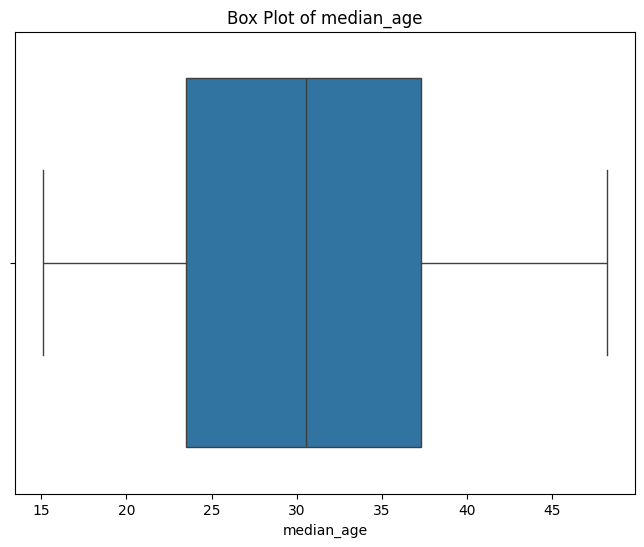

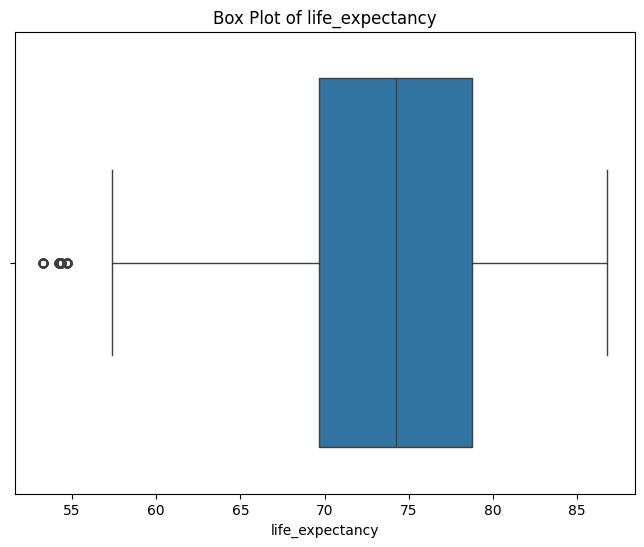

In [ ]:
# Drawing box plots
numerical_cols = ['median_age', 'life_expectancy'  ]

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

Violin plots


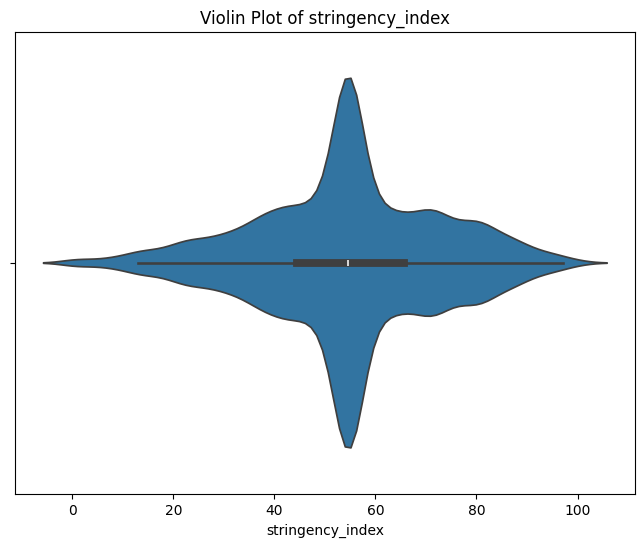

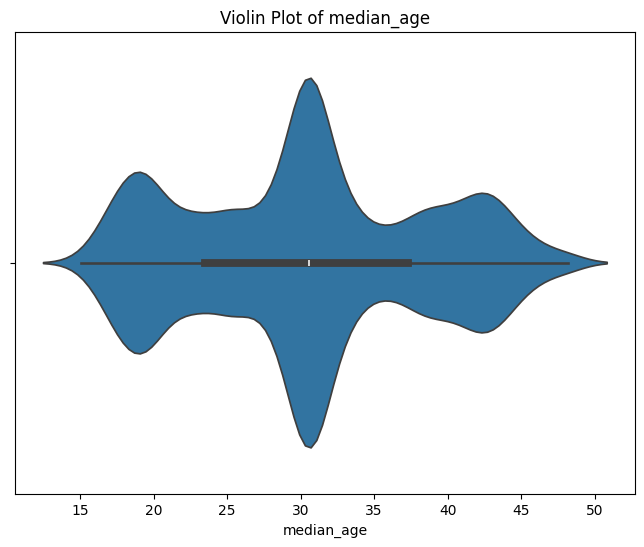

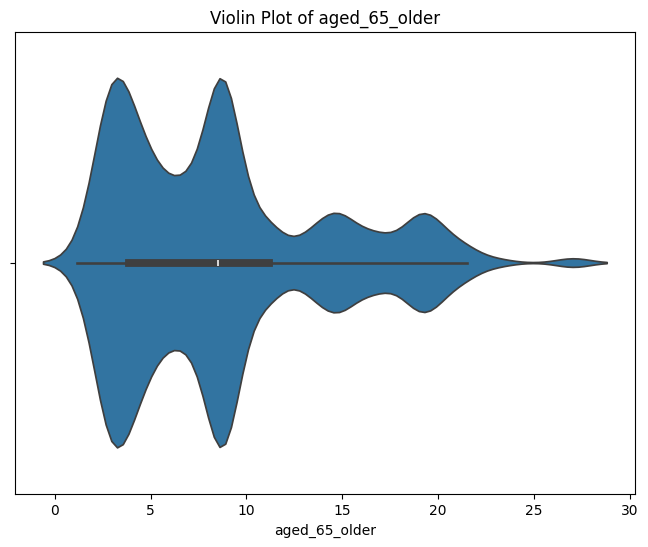

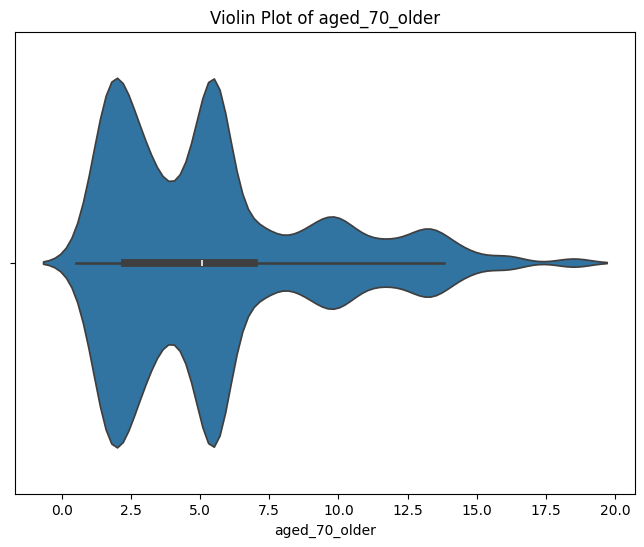

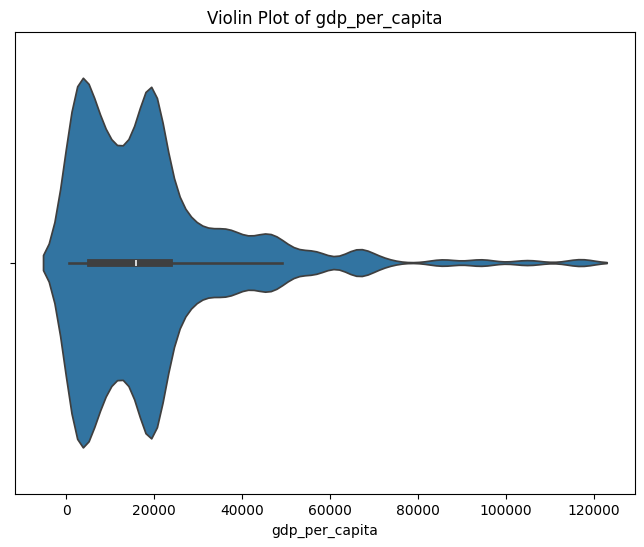

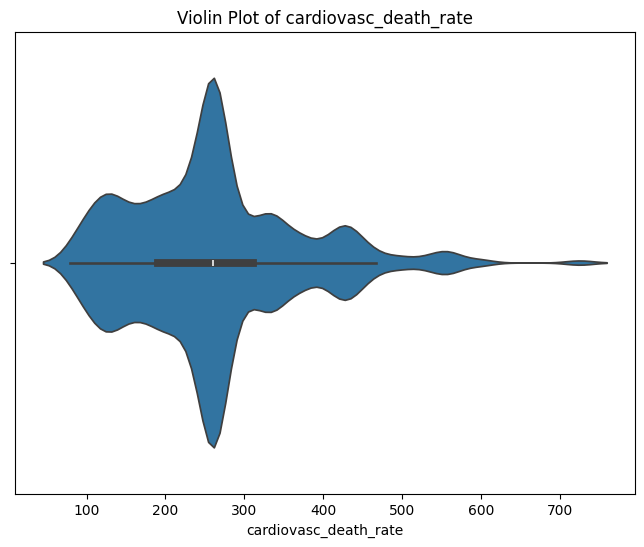

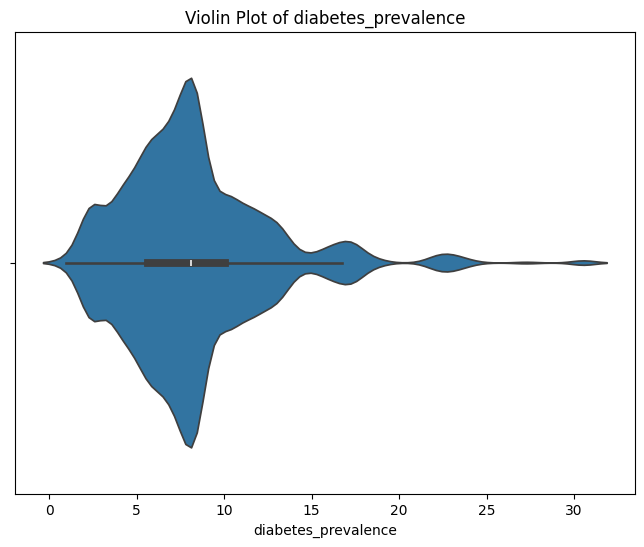

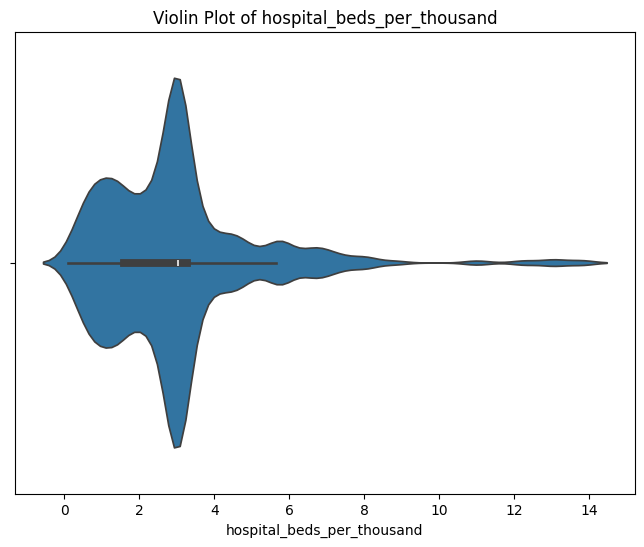

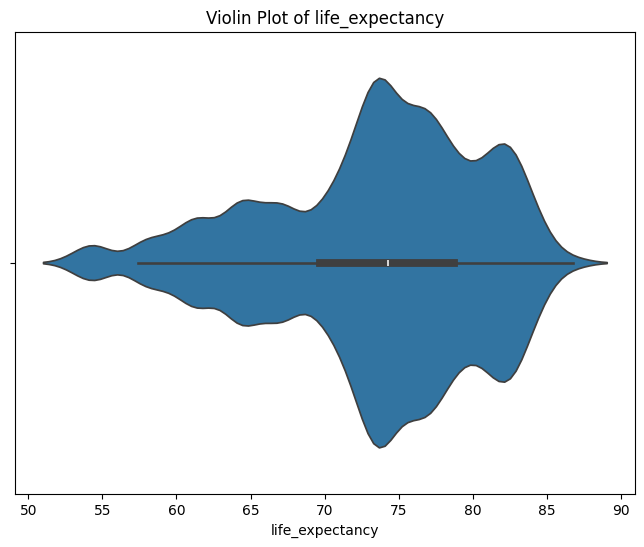

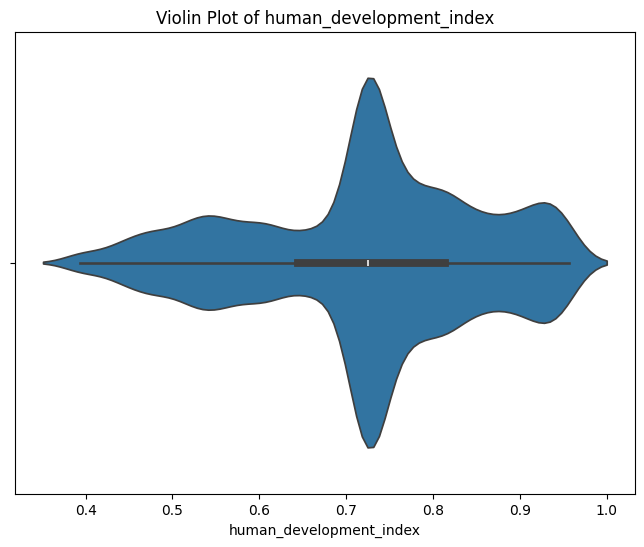

In [ ]:
# Create violin plots for numerical columns
numerical_cols =[
    'stringency_index',
    'median_age',
    'aged_65_older',
    'aged_70_older',
    'gdp_per_capita',
    'cardiovasc_death_rate',
    'diabetes_prevalence',
    'hospital_beds_per_thousand',
    'life_expectancy',
    'human_development_index'
]


for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=data[col])
    plt.title(f'Violin Plot of {col}')
    plt.show()

Scatter Plot

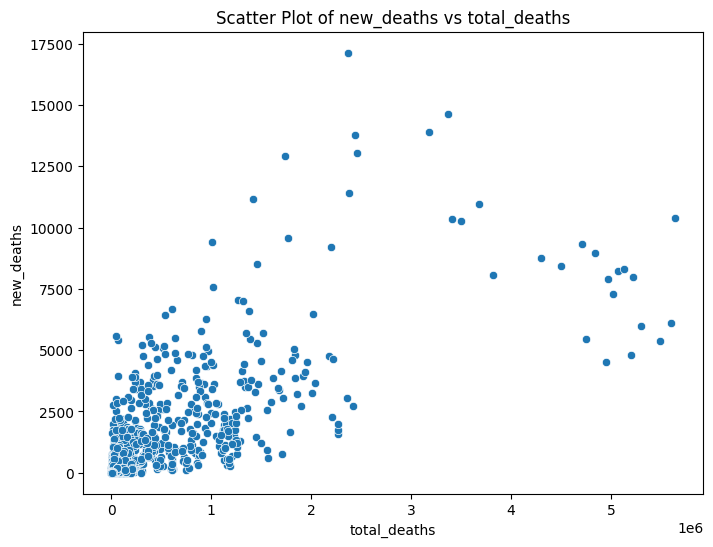

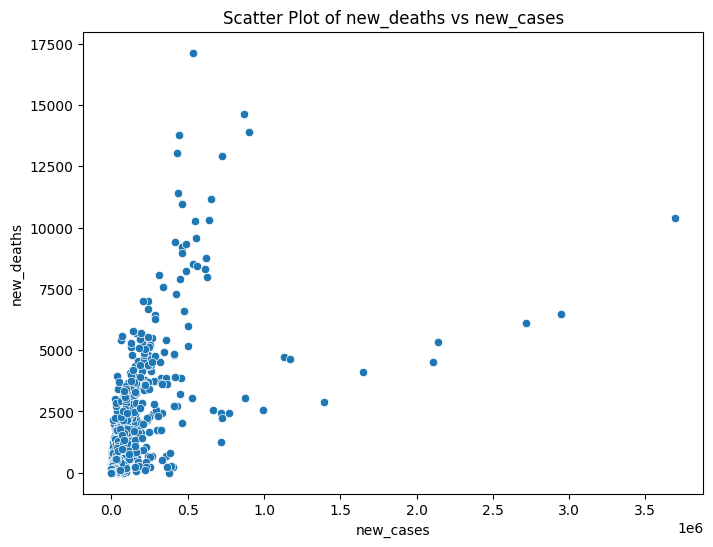

In [ ]:
# Drawing Scatter plots
scatter_plot_features = [

    ('total_deaths', 'new_deaths'),
    ('new_cases', 'new_deaths'),

]

for x_col, y_col in scatter_plot_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_col, y=y_col, data=data)
    plt.title(f'Scatter Plot of {y_col} vs {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

Histogram plot

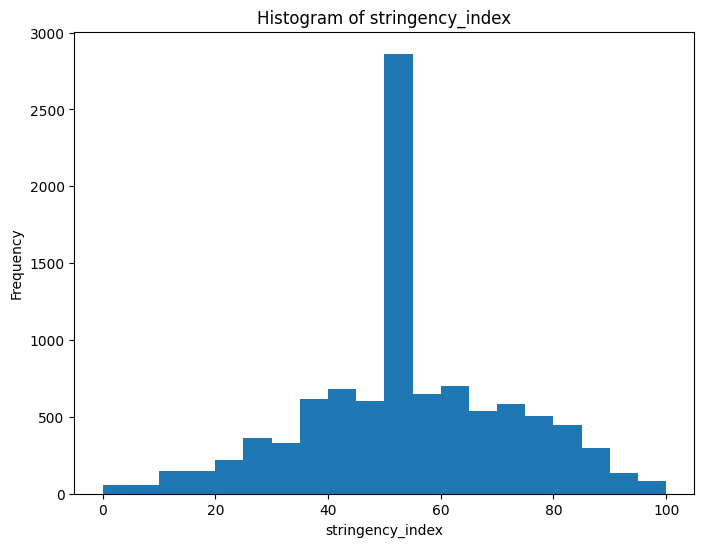

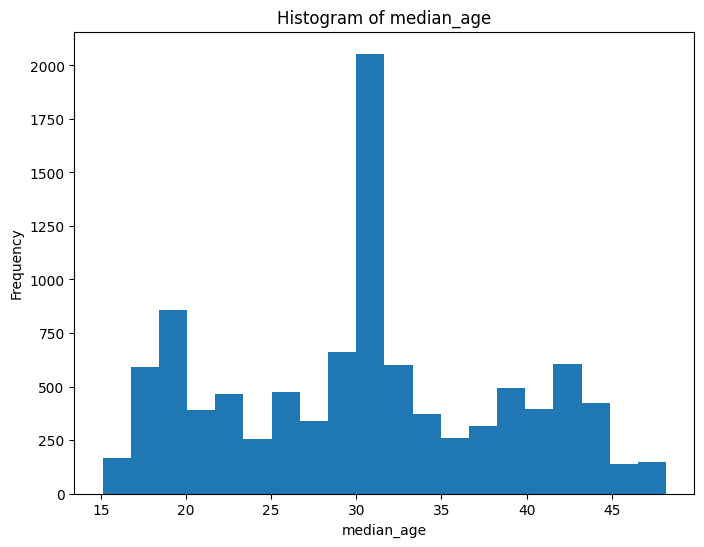

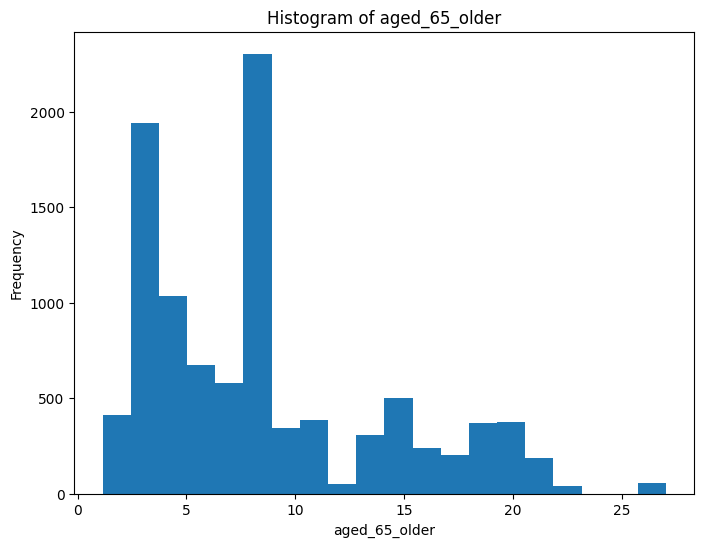

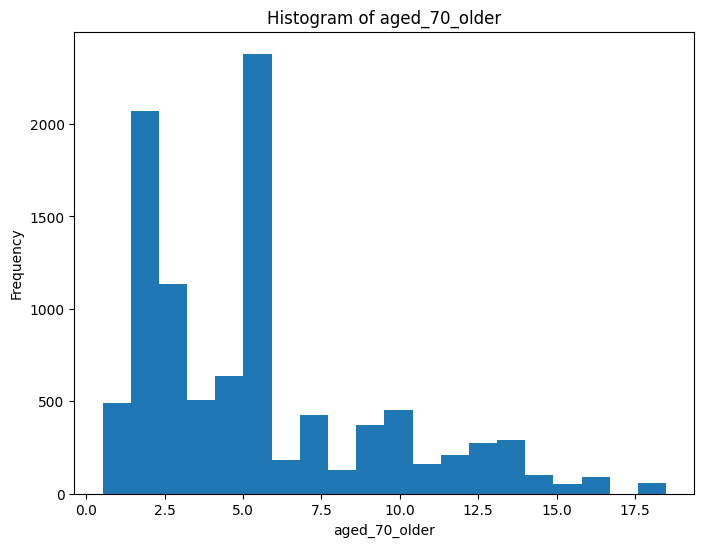

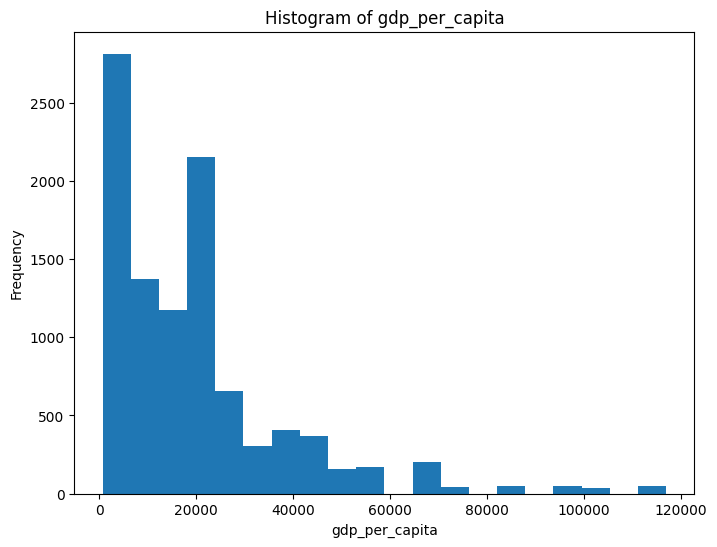

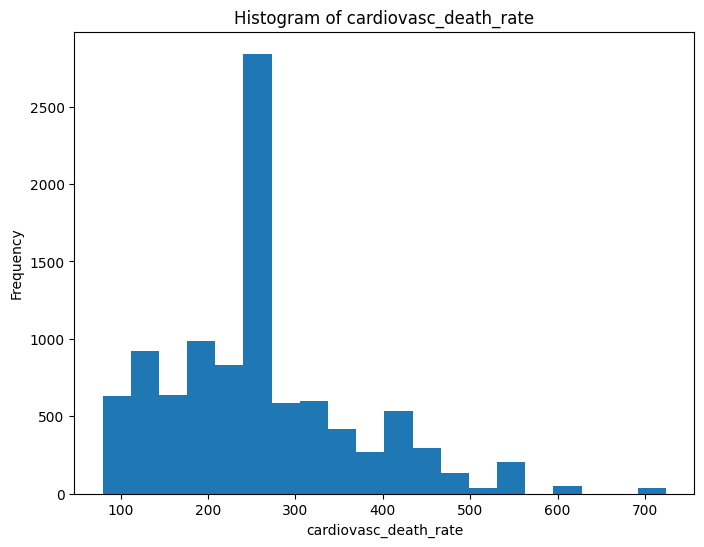

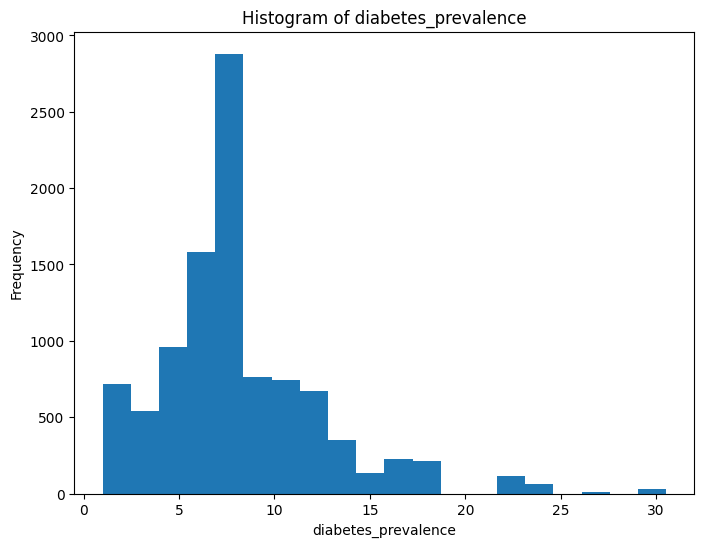

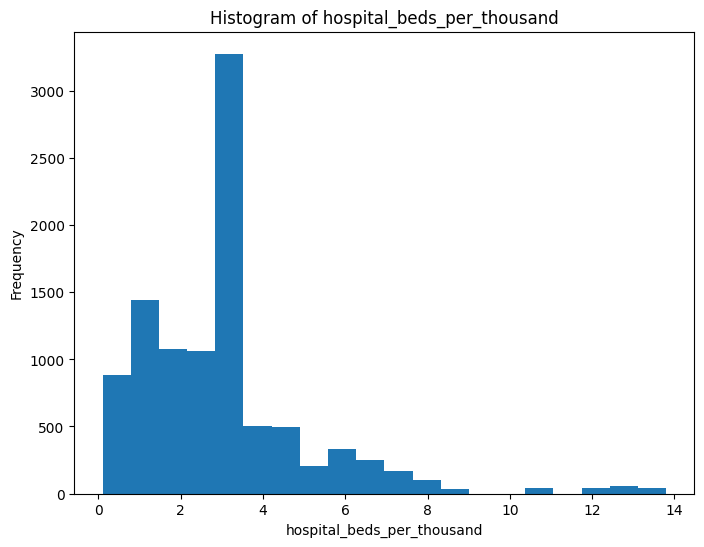

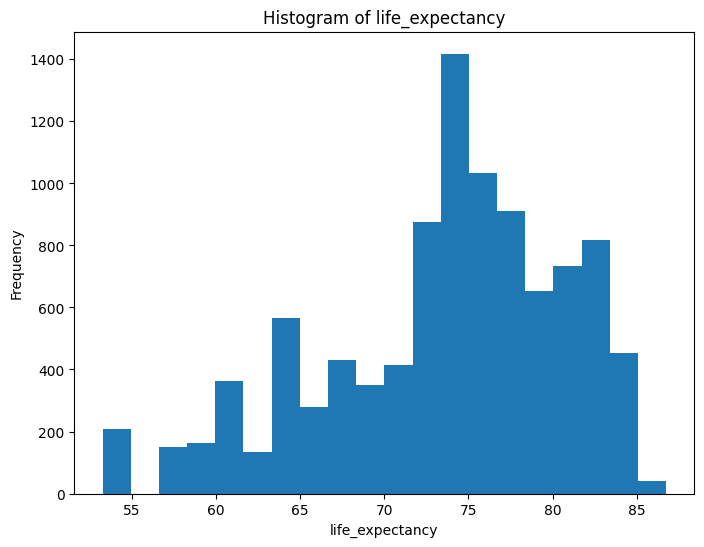

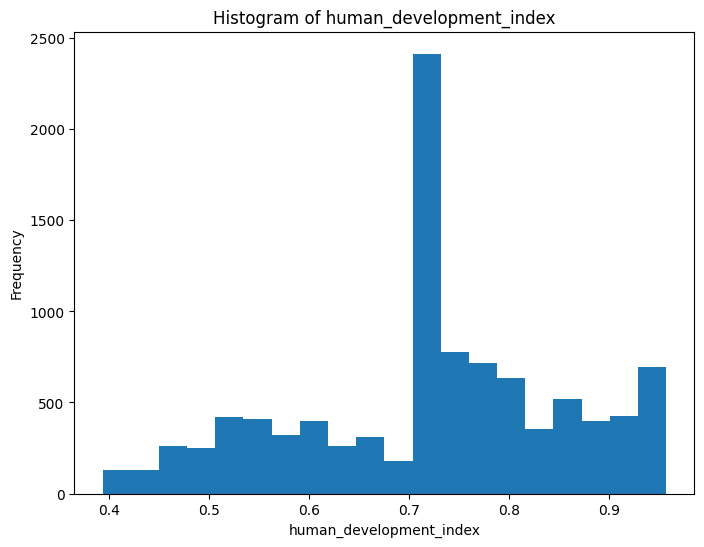

In [ ]:
# Drawing  histograms for numerical columns
numerical_cols = [

    'stringency_index',

    'median_age',
    'aged_65_older',
    'aged_70_older',
    'gdp_per_capita',
    'cardiovasc_death_rate',
    'diabetes_prevalence',
    'hospital_beds_per_thousand',
    'life_expectancy',
    'human_development_index'
]


for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(data[col], bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Line plot

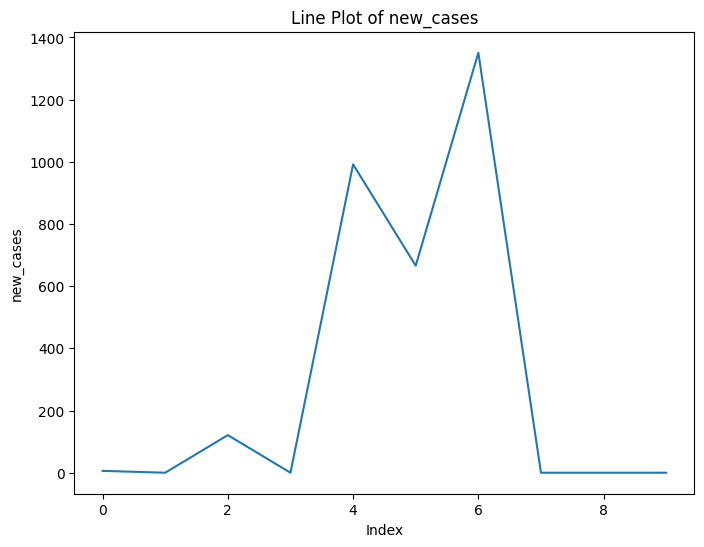

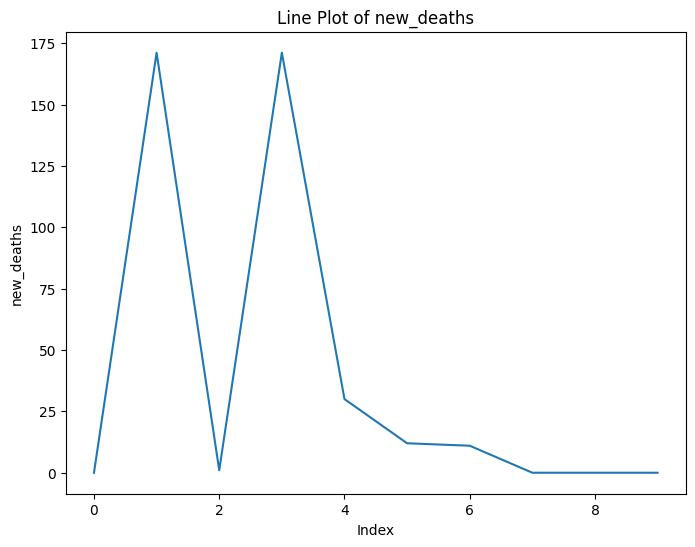

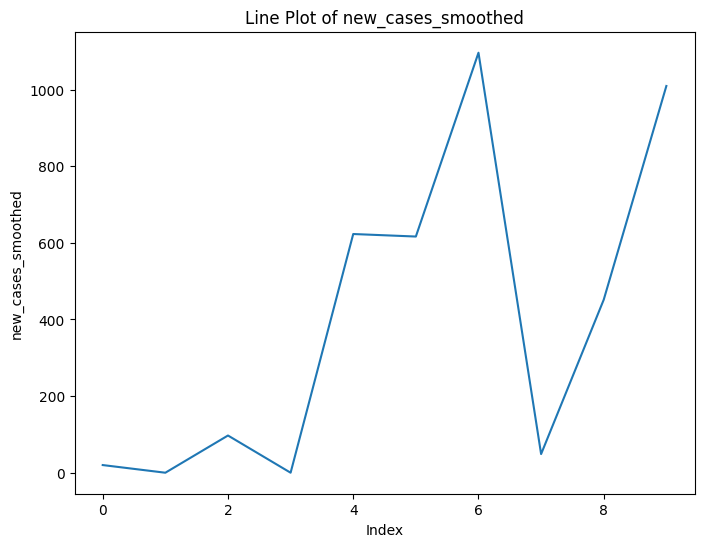

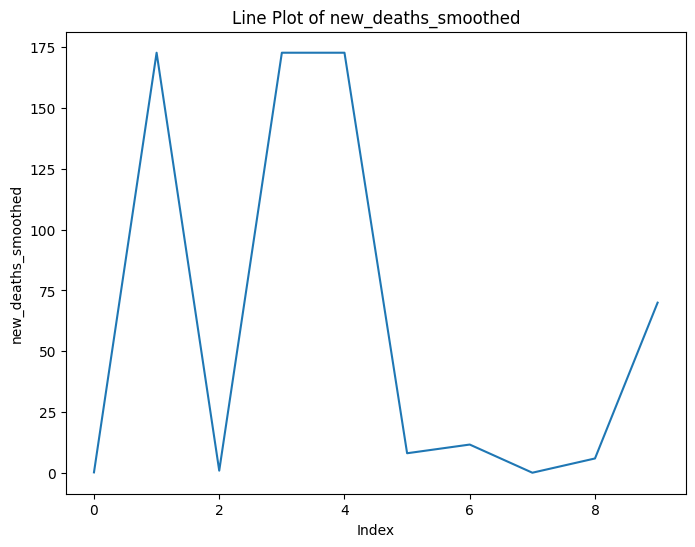

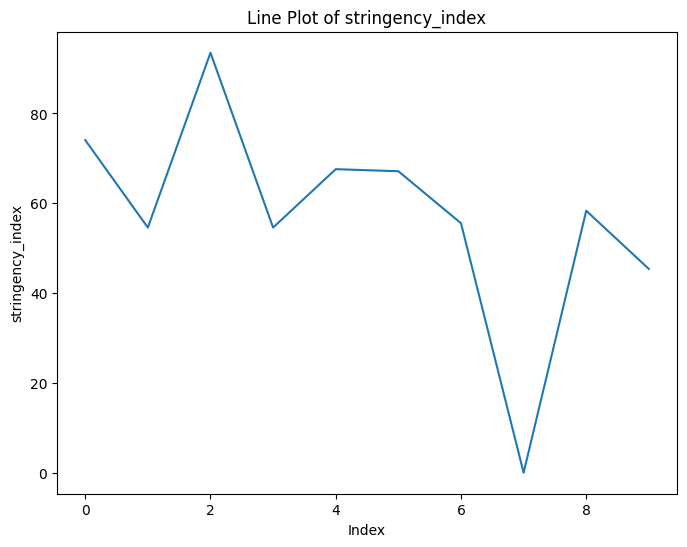

In [ ]:
# Create line plots for all numerical columns
numerical_cols =  [
    'new_cases',
    'new_deaths',
    'new_cases_smoothed',
    'new_deaths_smoothed',
    'stringency_index'
]

newData = data.head(10)

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.plot(newData[col])
    plt.title(f'Line Plot of {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.show()

Pair plot

In [ ]:
# Drawing the pair plot
sns.pairplot(data)
plt.show()

Pie chart

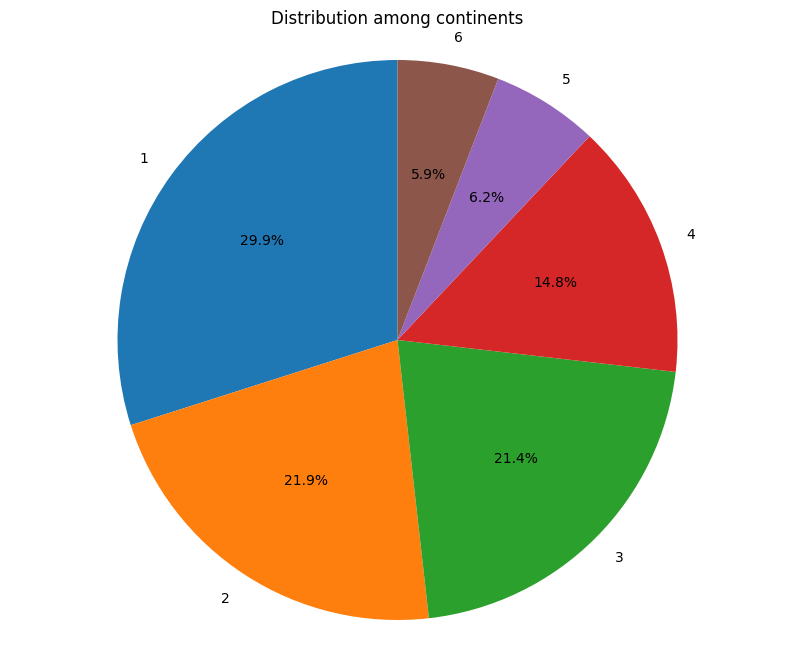

In [ ]:


#drawing pie chart

location_counts = data['continent'].value_counts()


plt.figure(figsize=(10, 8))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution among continents')
plt.axis('equal')
plt.show()

#distribution of dataset

Heat Map

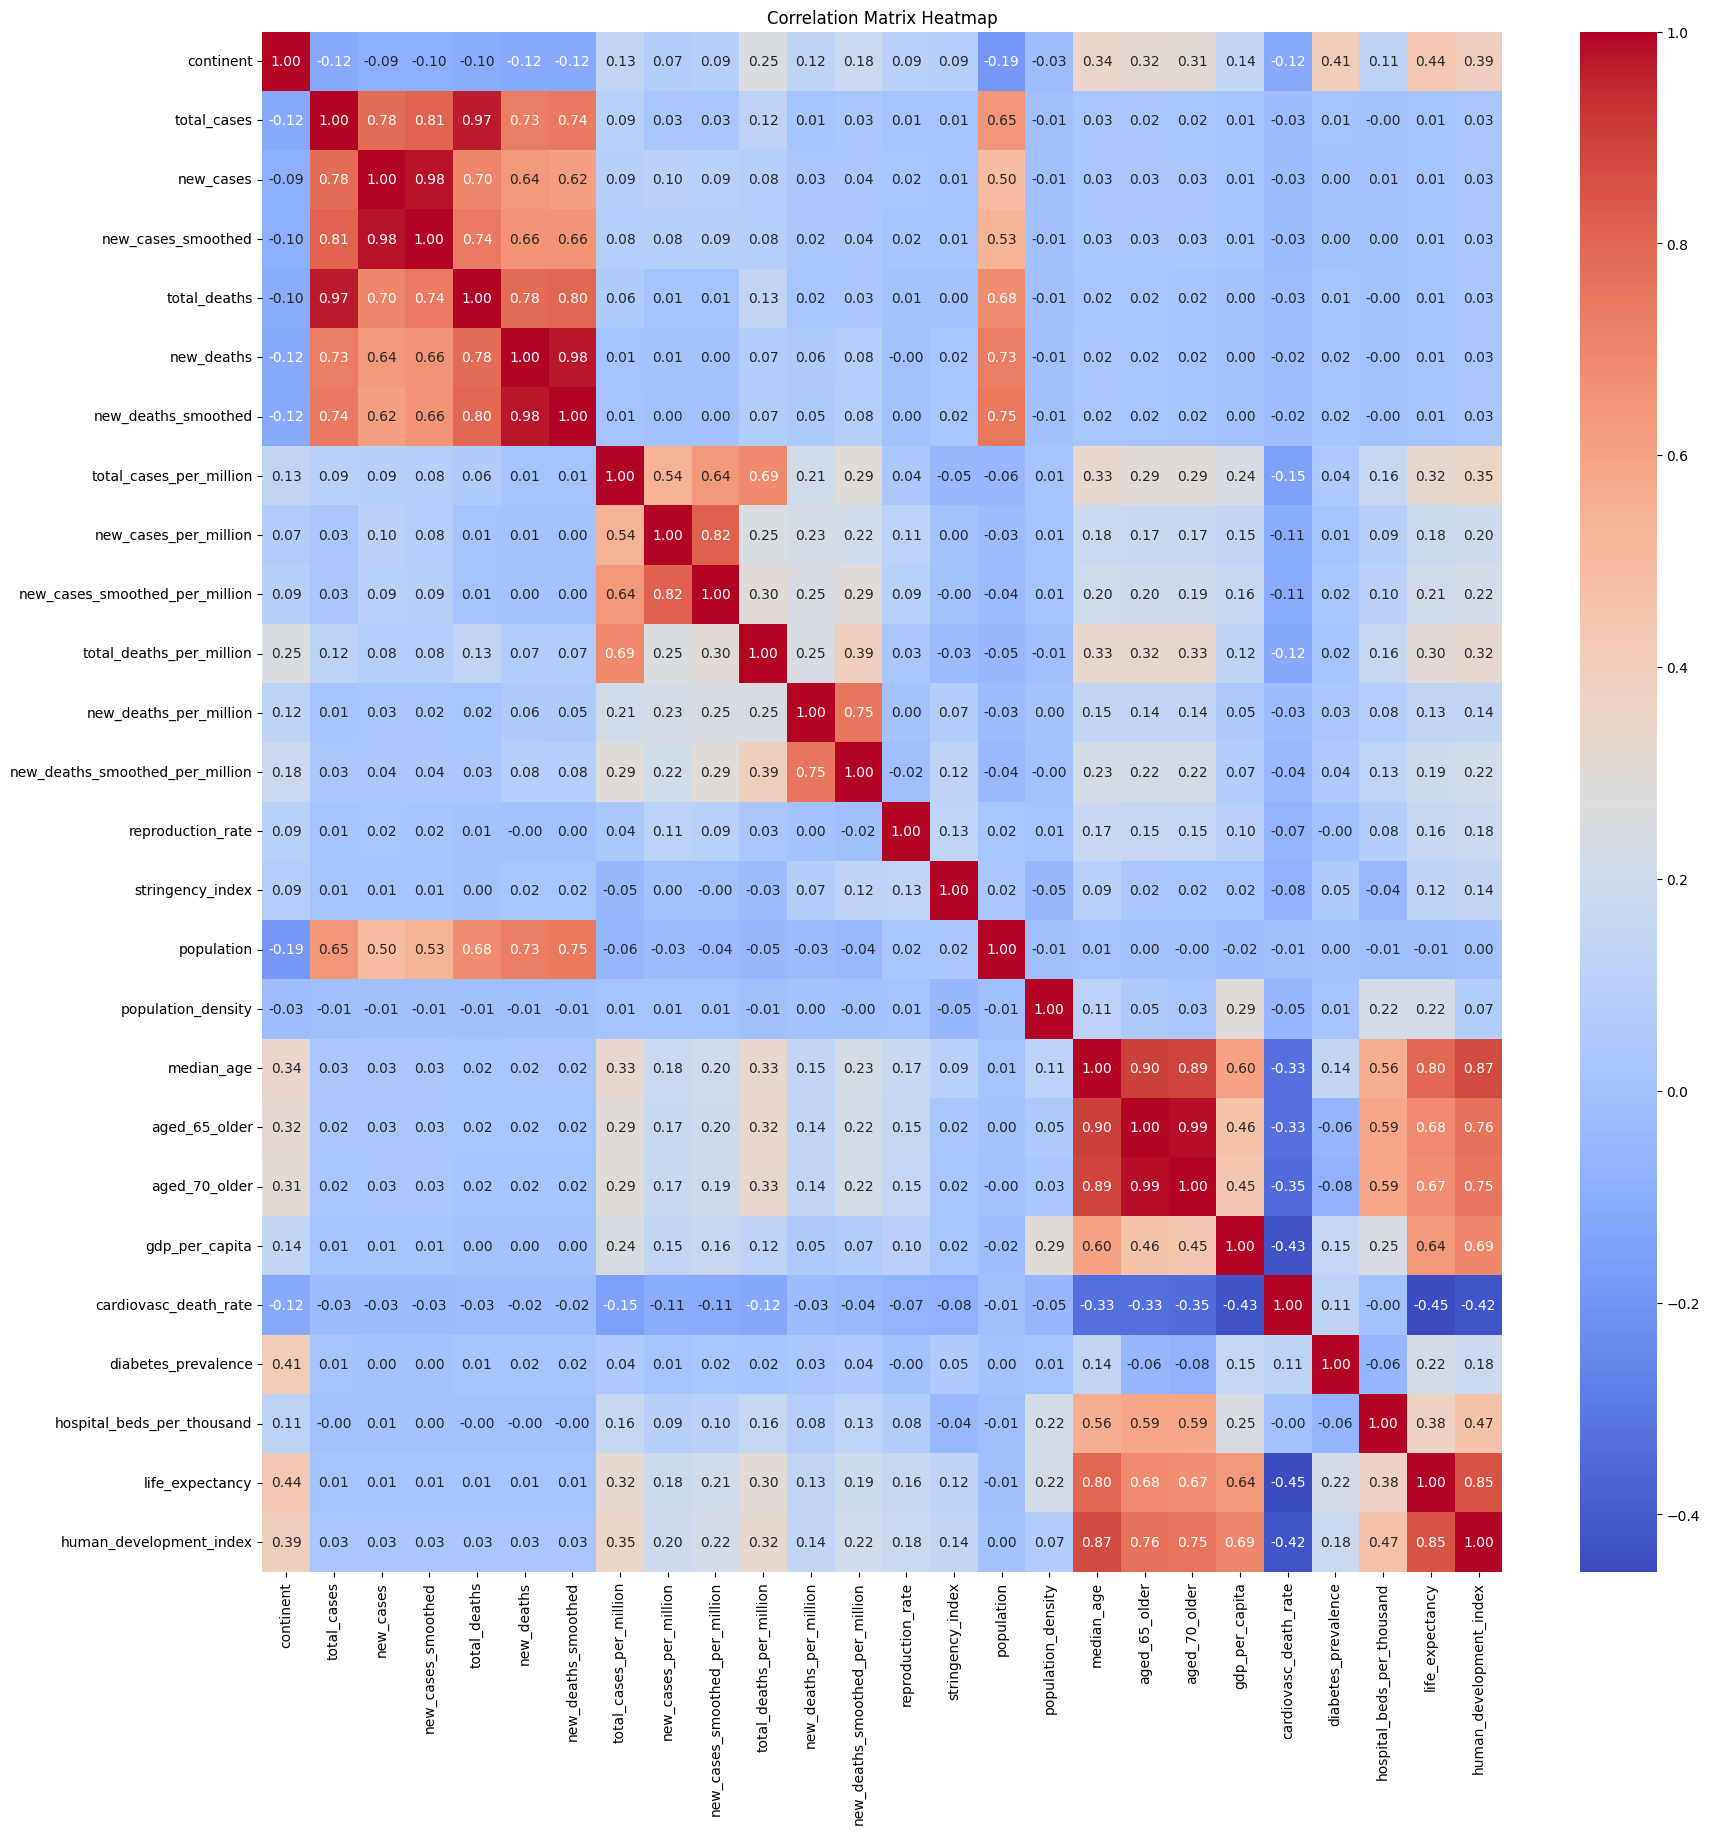

In [ ]:

#Drawing HeatMap
correlation_matrix = data.corr()


plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Donut Chart

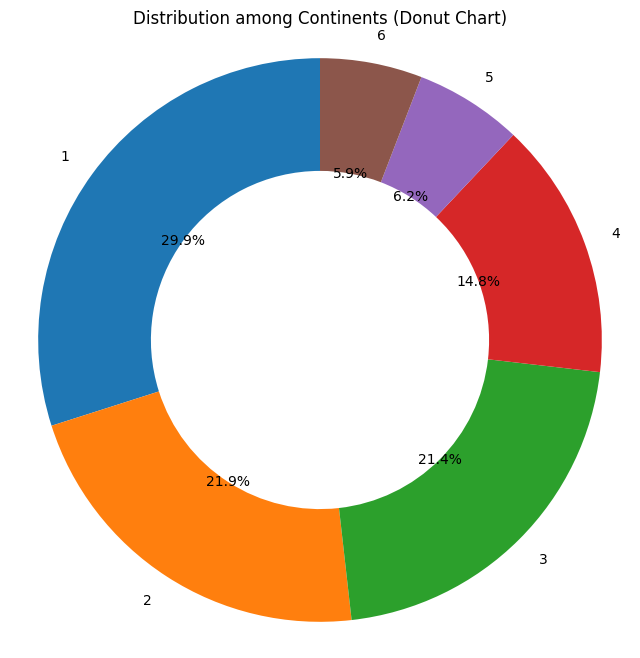

In [ ]:
# Drawing donut chart
continent_counts = data['continent'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title('Distribution among Continents (Donut Chart)')
plt.axis('equal')
plt.show()

Area Chart

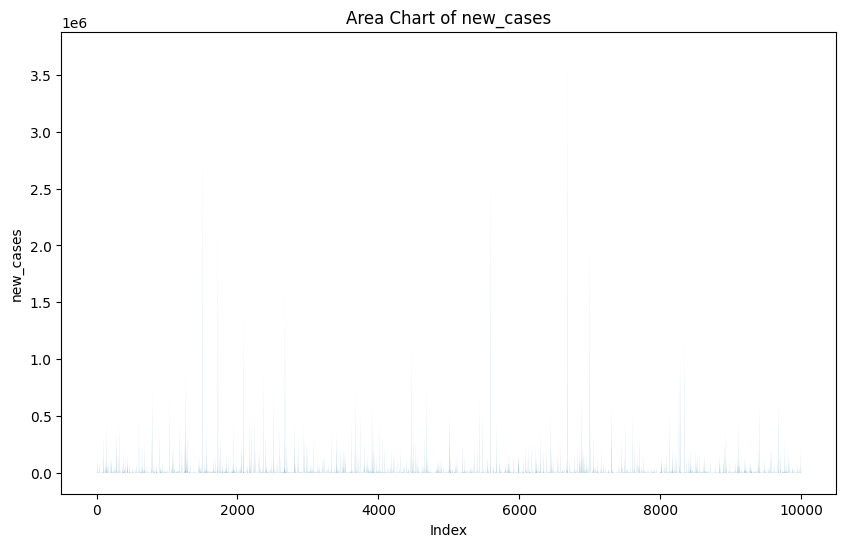

In [ ]:
#Area chart

column_to_plot = 'new_cases'

plt.figure(figsize=(10, 6))
plt.fill_between(data.index, data[column_to_plot], alpha=0.9)
plt.title(f'Area Chart of {column_to_plot}')
plt.xlabel('Index')
plt.ylabel(column_to_plot)
plt.show()

Bar Chart

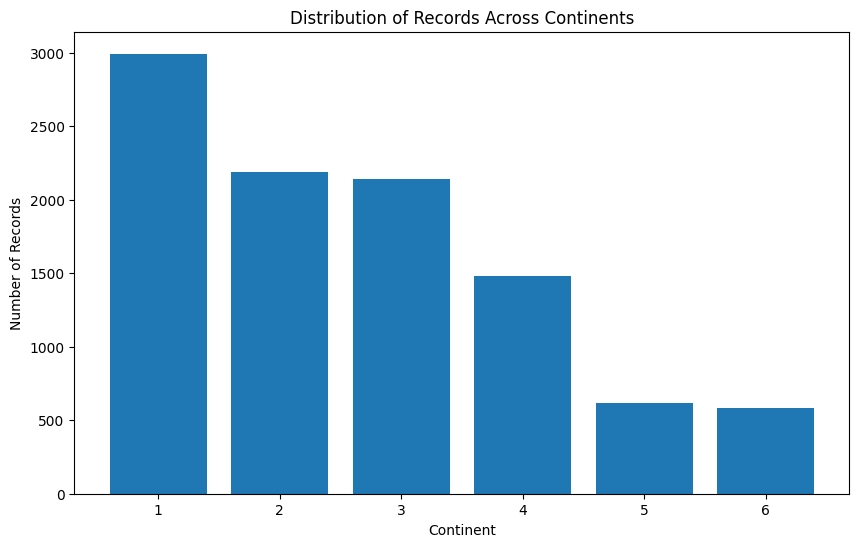

In [ ]:
#Bar Chart
continent_counts = data['continent'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(continent_counts.index, continent_counts.values)
plt.xlabel("Continent")
plt.ylabel("Number of Records")
plt.title("Distribution of Records Across Continents")
plt.show()

In [ ]:
# prompt: code to remove outliers

import pandas as pd

# Assuming 'data' DataFrame is already loaded and preprocessed as in your code

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Example usage for the 'median_age' column
data = remove_outliers_iqr(data, 'median_age')

# Example usage for the 'life_expectancy' column
data = remove_outliers_iqr(data, 'life_expectancy')


# ... (rest of your code)

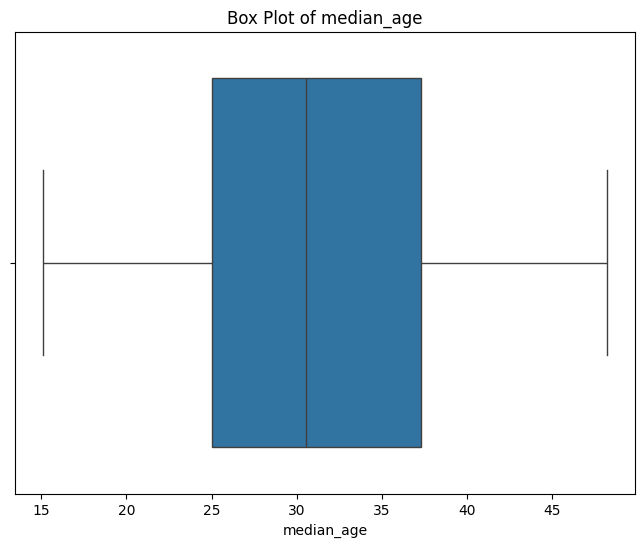

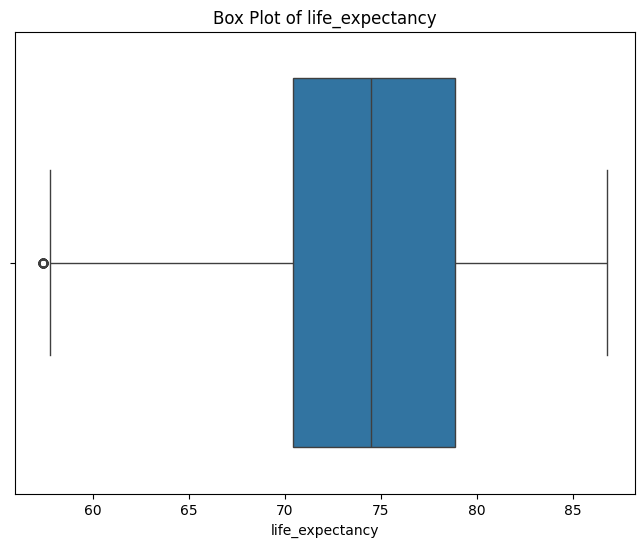

In [ ]:
# Drawing box plots
numerical_cols = ['median_age', 'life_expectancy'  ]

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()